# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.3


In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Carregando os Dados

In [4]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [5]:
# Shape
df_dsa.shape

(9700, 11)

In [6]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [7]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [8]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [9]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [10]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [11]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [12]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [13]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [14]:
dfcidade = df_dsa[df_dsa.Categoria == 'Office Supplies']
dfcidade = dfcidade.groupby('Cidade')['Valor_Venda'].sum()
dfcidade = dfcidade.sort_values(ascending=False)
cidade = dfcidade.idxmax()
print(f'A cidade com maior faturamento foi {cidade}')

A cidade com maior faturamento foi New York City


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

C:\Users\mathe\AppData\Local\Temp\ipykernel_17744\3849229214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpedidos['Data_Pedido'] = pd.to_datetime(dfpedidos['Data_Pedido'], format = '%d/%m/%Y')


,Valor_Venda
Data_Pedido,
2015-01-03,16.4480
2015-01-04,288.0600
2015-01-05,19.5360
2015-01-06,4407.1000
2015-01-07,87.1580
...,...
2018-12-26,814.5940
2018-12-27,177.6360
2018-12-28,1657.3508


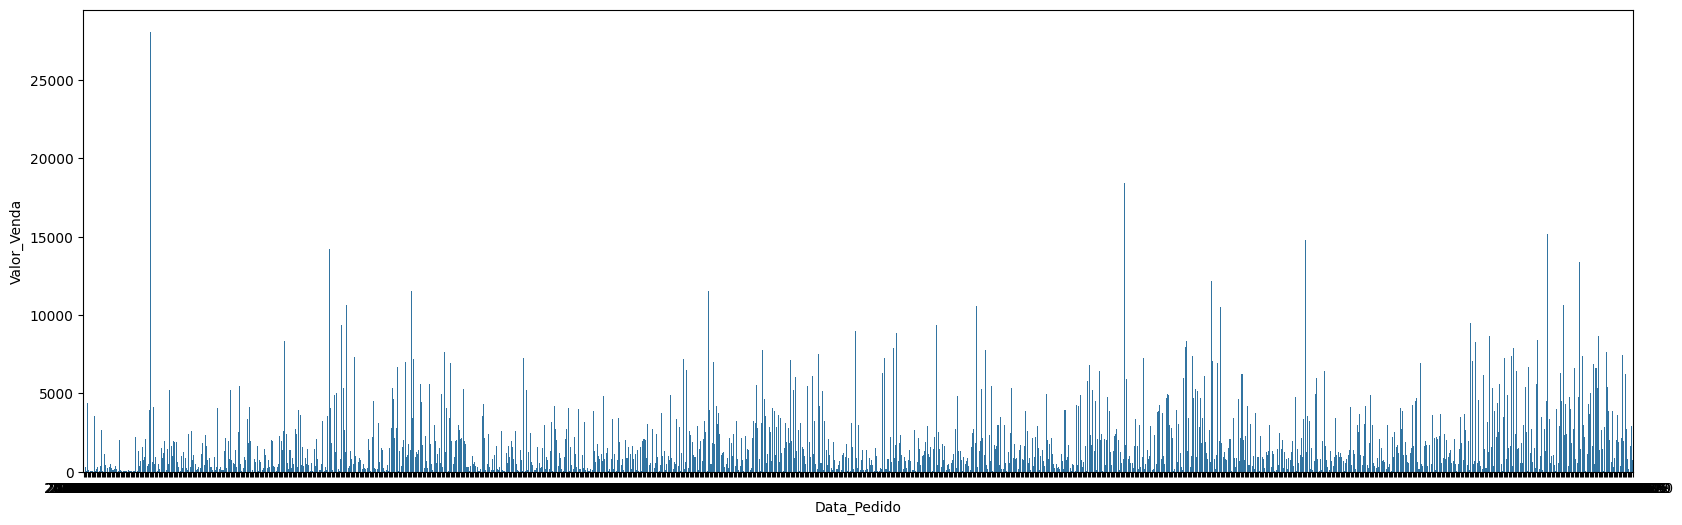

In [15]:
dfpedidos = df_dsa[['Data_Pedido', 'Valor_Venda']]
dfpedidos['Data_Pedido'] = pd.to_datetime(dfpedidos['Data_Pedido'], format = '%d/%m/%Y')
dfpedidos = dfpedidos.groupby('Data_Pedido')['Valor_Venda'].sum()
dfpedidos.sort_index()
dfpedidos = pd.DataFrame(dfpedidos)
display(dfpedidos)
plt.figure(figsize=(20,6))
sns.barplot(data=dfpedidos,y='Valor_Venda',x='Data_Pedido')
plt.show()



## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

,Valor_Venda
Estado,
Alabama,19510.6400
Arizona,35272.6570
Arkansas,11673.8300
California,442927.0975
Colorado,31841.5980


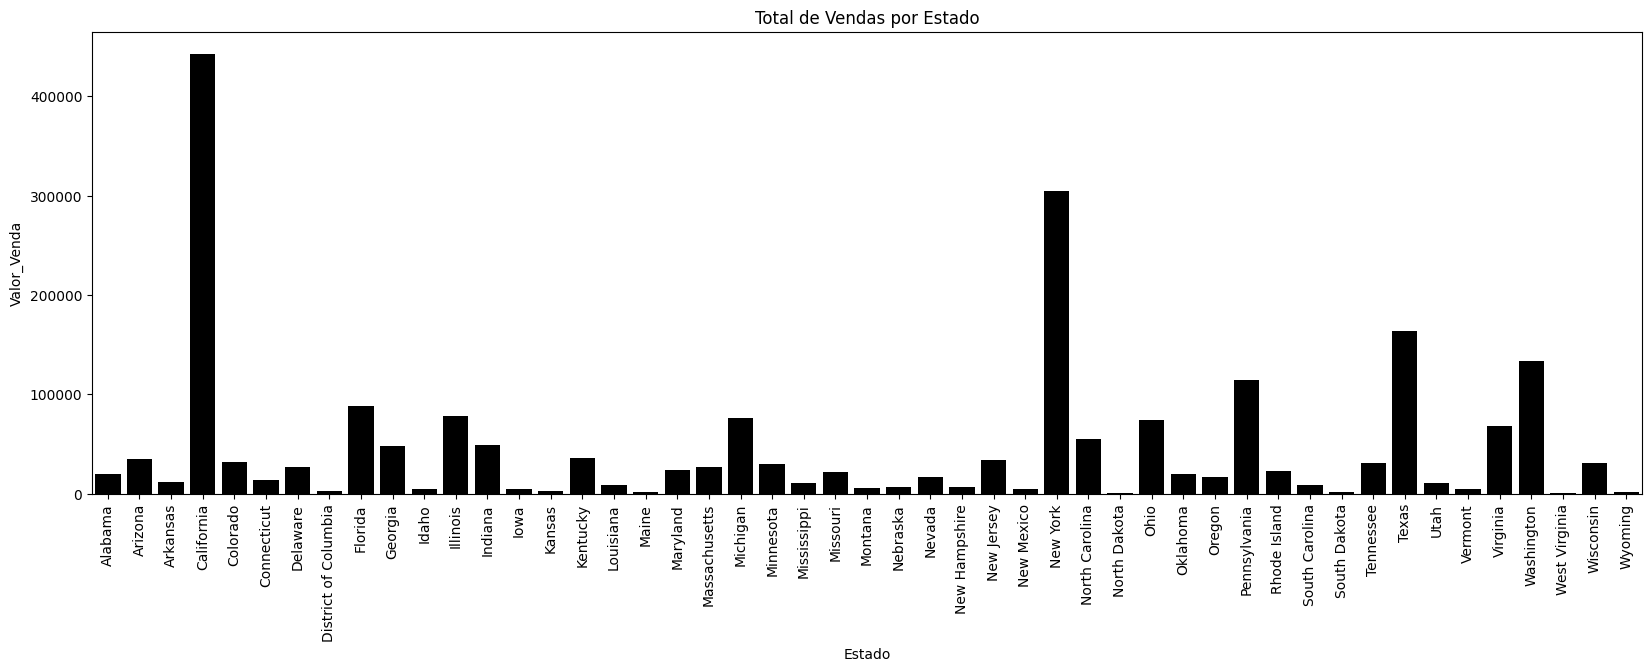

In [16]:
dfestado = df_dsa.groupby('Estado')['Valor_Venda'].sum()
dfestado = pd.DataFrame(dfestado)
display(dfestado.head())

plt.figure(figsize=(20,6))
sns.barplot(data = dfestado, x = 'Estado', y = 'Valor_Venda', color = 'Black')
plt.title('Total de Vendas por Estado')
plt.xticks(rotation = 90)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


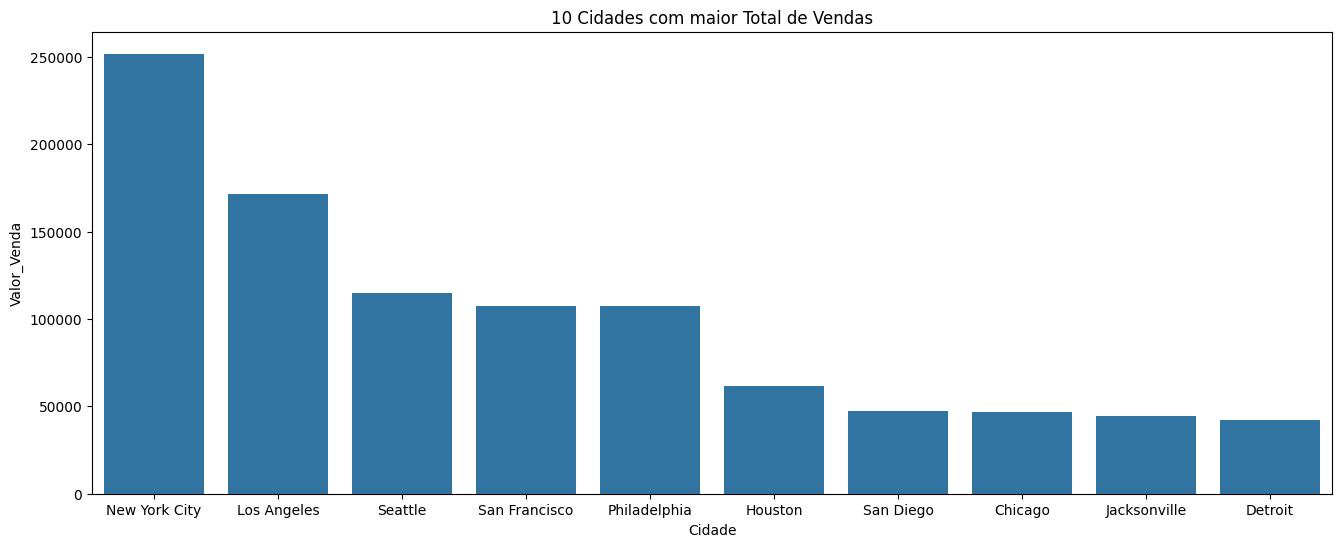

In [24]:
topc = pd.DataFrame(df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by= 'Valor_Venda',ascending = False).head(10))
display(topc)
plt.figure(figsize=(16,6))
sns.barplot(data = topc,
            x = 'Cidade',
            y = 'Valor_Venda')
plt.title('10 Cidades com maior Total de Vendas')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


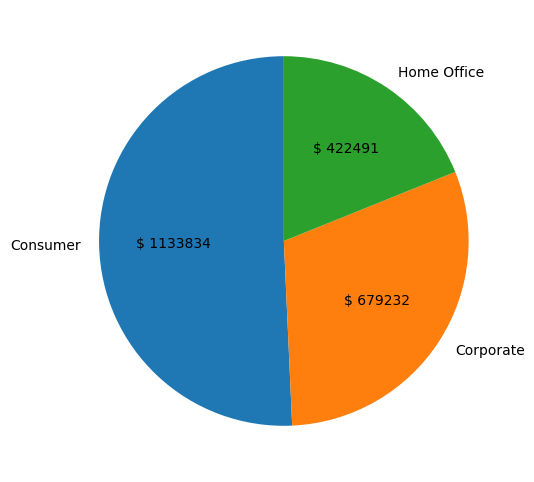

In [18]:
dfseg = pd.DataFrame(df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index())
display(dfseg)

def autopct_format(values):
    def my_format (pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '$ {v:d}'.format(v = val)
    return my_format

display(dfseg)

plt.figure(figsize = (16,6))
plt.pie(dfseg['Valor_Venda'],
        labels = dfseg['Segmento'],
        autopct= autopct_format(dfseg['Valor_Venda']),
        startangle=90)
        

plt.show()


## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [19]:
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'],format='%d/%m/%Y')
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year
dfsegano = df_dsa[['Data_Pedido','Segmento','Valor_Venda']]
dfsegano['Data_Pedido'] = pd.to_datetime(dfsegano['Data_Pedido'],format='%d/%m/%Y')
dfsegano['Ano'] = dfsegano['Data_Pedido'].dt.year
dfsegano = pd.DataFrame(dfsegano.groupby(['Segmento','Ano'])['Valor_Venda'].sum())

display(dfsegano)

C:\Users\mathe\AppData\Local\Temp\ipykernel_17744\1326915534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsegano['Data_Pedido'] = pd.to_datetime(dfsegano['Data_Pedido'],format='%d/%m/%Y')
C:\Users\mathe\AppData\Local\Temp\ipykernel_17744\1326915534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsegano['Ano'] = dfsegano['Data_Pedido'].dt.year


Valor_Venda
Segmento    Ano              
Consumer    2015  256719.9166
            2016  265295.2593
            2017  288459.5572
            2018  323359.6019
Corporate   2015  125819.5957
            2016  114643.1229
            2017  203266.7398
            2018  235502.7284
Home Office 2015   88229.0878
            2016   74134.1332
            2017  103639.6270
            2018  156488.5849

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [26]:
dfdesc = df_dsa [:]
dfdesc['Desconto'] = np.where(dfdesc['Valor_Venda']>1000,.15,.10)
cont15 = (dfdesc['Desconto'] == .15).sum()
print(f'{cont15} Vendas Receberiam 15% de desconto.')
display(dfdesc)

457 Vendas Receberiam 15% de desconto.


C:\Users\mathe\AppData\Local\Temp\ipykernel_17744\62755828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdesc['Desconto'] = np.where(dfdesc['Valor_Venda']>1000,.15,.10)


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Mês,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,Novembro,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,Novembro,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,Junho,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,Outubro,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,Outubro,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018,Dezembro,0.1
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018,Dezembro,0.1
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018,Dezembro,0.1
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,2017,Outubro,0.1


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [21]:
dfdesc['Valor_Venda_Desc15'] = np.where(dfdesc['Desconto'] == .15, dfdesc['Valor_Venda']*(1-dfdesc['Desconto']),dfdesc['Valor_Venda'])

media_ant = dfdesc['Valor_Venda'].mean()
media_desc = dfdesc['Valor_Venda_Desc15'].mean()



print(f'A media de vendas antes era {media_ant:2f} e depois ficou {media_desc:2f}')

A media de vendas antes era 230.469892 e depois ficou 215.510390


C:\Users\mathe\AppData\Local\Temp\ipykernel_17744\2333678194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdesc['Valor_Venda_Desc15'] = np.where(dfdesc['Desconto'] == .15, dfdesc['Valor_Venda']*(1-dfdesc['Desconto']),dfdesc['Valor_Venda'])


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [22]:
df_dsa['Mês'] = df_dsa['Data_Pedido'].dt.month_name(locale='pt_PT.UTF-8')
dfseganomes = pd.DataFrame(df_dsa[:])
dfseganomes = dfseganomes[['Ano','Mês', 'Segmento', 'Valor_Venda']]
dfseganomes = pd.DataFrame(dfseganomes.groupby(['Segmento','Ano','Mês'])['Valor_Venda'].mean())
display(dfseganomes)



Valor_Venda
Segmento    Ano  Mês                   
Consumer    2015 Abril       189.762750
                 Agosto      195.232044
                 Dezembro    248.133962
                 Fevereiro   117.327926
                 Janeiro     146.736787
...                                 ...
Home Office 2018 Maio        242.203730
                 Marã§o      131.931055
                 Novembro    247.519423
                 Outubro     412.576597
                 Setembro    249.140597

[144 rows x 1 columns]

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [23]:
dftop12 = df_dsa[:]
dftop12r = dftop12.groupby('SubCategoria')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda',ascending=False).head(12)
dftop12['Rank'] = dftop12['SubCategoria'].apply(lambda x: 'rank' if x in dftop12r['SubCategoria'].values else 'not rank')

dftop12 = dftop12[dftop12['Rank'] == 'rank']

dftop12 = dftop12.groupby(['Categoria','SubCategoria','Rank'])['Valor_Venda'].sum()


display(dftop12)

C:\Users\mathe\AppData\Local\Temp\ipykernel_17744\1470313927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftop12['Rank'] = dftop12['SubCategoria'].apply(lambda x: 'rank' if x in dftop12r['SubCategoria'].values else 'not rank')


Categoria        SubCategoria  Rank
Furniture        Bookcases     rank    108045.0467
                 Chairs        rank    317919.6250
                 Furnishings   rank     88862.7700
                 Tables        rank    202083.3600
Office Supplies  Appliances    rank    104061.6930
                 Binders       rank    194723.3810
                 Paper         rank     76312.7640
                 Storage       rank    216188.3620
Technology       Accessories   rank    162791.3620
                 Copiers       rank    146248.0940
                 Machines      rank    189238.6310
                 Phones        rank    325271.2940
Name: Valor_Venda, dtype: float64

# Fim